In [1]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import  preprocessing
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy as sc
import pandas as pd
import random
from PIL import Image

In [2]:
DATASET_PATH = 'Datasets/BrainTumorImage/'
DATA_DF_PATH = DATASET_PATH + "data_df.csv"
IMAGE_DF_PATH = DATASET_PATH + "image_df.csv"
IMAGE_SIDE = 128
TOTAL_INPUTS = IMAGE_SIDE * IMAGE_SIDE
seed = 12
np.random.seed(seed)
random.seed(seed)

In [3]:
data_df = pd.read_csv(DATA_DF_PATH)
image_df = pd.read_csv(IMAGE_DF_PATH)

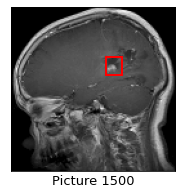

In [4]:
fig = plt.figure(figsize=[10, 10])
fig.patch.set_facecolor('white')


plt.subplot(2, 3, 1)
rand_pick = 1500

img = np.array(image_df.iloc[rand_pick]).reshape((128, 128))

data = data_df.iloc[rand_pick]
corner_x  = data["corner_x"]
corner_y  = data["corner_y"]
width  = data["width"]
height  = data["height"]

plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('Picture ' + str(rand_pick), fontsize=13)
currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((corner_x, corner_y), width, height, linewidth=2, edgecolor='r', facecolor='none'))

fig.subplots_adjust(hspace=-0.4)
plt.show()

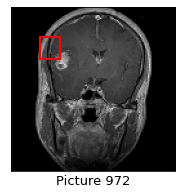

In [5]:
fig = plt.figure(figsize=[10, 10])
fig.patch.set_facecolor('white')


plt.subplot(2, 3, 1)
rand_pick = 972

img = np.array(image_df.iloc[rand_pick]).reshape((128, 128))
#im = Image.fromarray(np.uint8(img))
#new = im.resize((32,32))
#img2=np.asarray(new)

data = data_df.iloc[rand_pick]
corner_x  = data["corner_x"]/1.5
corner_y  = data["corner_y"]/1.5
width  = data["width"]
height  = data["height"]

plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('Picture ' + str(rand_pick), fontsize=13)
currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((corner_x, corner_y), width, height, linewidth=2, edgecolor='r', facecolor='none'))

fig.subplots_adjust(hspace=-0.4)
plt.show()

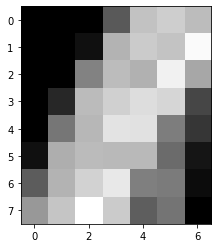

In [6]:
tumor_ = img[corner_x.astype(int):(corner_x.astype(int)+8), corner_y.astype(int):(corner_x.astype(int)+8)]
plt.imshow(tumor_, cmap='gray')

In [7]:
pick = [129, 130, 1350, 12, 171, 455, 923]
pick2 = [688, 588, 290, 467, 740, 866, 972]

tumor_list1 = np.empty(shape=[0,8])
benign_list = np.empty(shape=[0,8])

for i in range (5):
    

    img = np.array(image_df.iloc[pick[i]]).reshape((128, 128))
    #im = Image.fromarray(np.uint8(img))
    #new = im.resize((32,32))
    #img2=np.asarray(new)


    data = data_df.iloc[rand_pick]
    corner_x  = data["corner_x"]
    corner_y  = data["corner_y"]
    width  = data["width"]
    height  = data["height"]

    tumor_ = img[corner_x.astype(int):(corner_x.astype(int)+8), corner_y.astype(int):(corner_x.astype(int)+8)]
    tumor_Im = Image.fromarray(np.uint8(tumor_))
    tumor_res = tumor_Im.resize((8,1))
    tumor_fin = np.asarray(tumor_res)
    
    tumor_list1 = np.append(tumor_list1, tumor_fin, axis=0)
    

In [8]:
tumor_list2 = np.empty(shape=[0,8])


for i in range (5):
    

    img = np.array(image_df.iloc[pick2[i]]).reshape((128, 128))
    #im = Image.fromarray(np.uint8(img))
    #new = im.resize((32,32))
    #img2=np.asarray(new)

    data = data_df.iloc[rand_pick]
    corner_x  = data["corner_x"]
    corner_y  = data["corner_y"]
    width  = data["width"]
    height  = data["height"]

    tumor_ = img[corner_x.astype(int):(corner_x.astype(int)+8), corner_y.astype(int):(corner_x.astype(int)+8)]
    tumor_Im = Image.fromarray(np.uint8(tumor_))
    tumor_res = tumor_Im.resize((8,1))
    tumor_fin = np.asarray(tumor_res)
    
    tumor_list2 = np.append(tumor_list2, tumor_fin, axis=0)

In [9]:
b_list = np.append(pick, pick2)

for i in range (5):
    

    img = np.array(image_df.iloc[b_list[i]]).reshape((128, 128))
    #im = Image.fromarray(np.uint8(img))
    #new = im.resize((32,32))
    #img2=np.asarray(new)

    data = data_df.iloc[rand_pick]
    corner_x  = data["corner_x"]/1.5
    corner_y  = data["corner_y"]/1.5
    width  = data["width"]
    height  = data["height"]

    
    benign_ = img[corner_x.astype(int):(corner_x.astype(int)+8), corner_y.astype(int):(corner_x.astype(int)+8)]
    benign_Im = Image.fromarray(np.uint8(benign_))
    benign_res = benign_Im.resize((8,1))
    benign_fin = np.asarray(benign_res)
    
    benign_list = np.append(benign_list, benign_fin, axis=0)

In [10]:
params = np.random.random(51, requires_grad=True)

x_tumors1 = preprocessing.normalize(tumor_list1, axis=0)
x_tumors2 = preprocessing.normalize(tumor_list2, axis=0)
x_benign = preprocessing.normalize(benign_list, axis=0)

In [11]:
def state_prep(data1, data2):   # Embeds desired classical information to the quantum circuit
    qml.BasisEmbedding(np.array([0, 0, 0, 0]), wires=[0, 1, 2, 3])
    
    for i in range (8):
        qml.RX(data1[i], wires=i+4)

    for j in range (8):
        qml.RX(data2[j], wires=j+12)

    #qml.BasisEmbedding(data2, wires=[5, 6, 7, 8])

In [12]:
# Lets build a circuit, This is where the magic happens.

dev_p = qml.device('default.qubit', wires=20, shots=None)    # Define the quantum device

@qml.qnode(dev_p)
def circuit(params, data1, data2):
    n_qubits = 20
    w_count = 4
    n = 0
    
    state_prep(data1, data2)
 
    while w_count < 20:                                       
        qml.Rot(params[n], params[n+1], params[n+2], wires=w_count)
        w_count += 1
        n += 3
            
    qml.CNOT(wires=[4, 5])
    qml.CNOT(wires=[5, 6])
    qml.CNOT(wires=[6, 7])
    qml.CNOT(wires=[7, 8])
    qml.CNOT(wires=[8, 9])
    qml.CNOT(wires=[9, 10])
    qml.CNOT(wires=[10, 11])
    qml.CNOT(wires=[11, 4])


    qml.CNOT(wires=[12, 13])
    qml.CNOT(wires=[13, 14])
    qml.CNOT(wires=[14, 15])
    qml.CNOT(wires=[15, 16])
    qml.CNOT(wires=[16, 17])
    qml.CNOT(wires=[17, 18])
    qml.CNOT(wires=[18, 19])
    qml.CNOT(wires=[19, 12])

    

    qml.Hadamard(0)             # Ancilla qubit 1
    qml.CSWAP(wires=(0, 2, 4))
    qml.Hadamard(0)
    
    qml.Hadamard(1)             # Ancilla qubit 2
    qml.CSWAP(wires=(1, 3, 12))
    qml.Hadamard(1)


    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

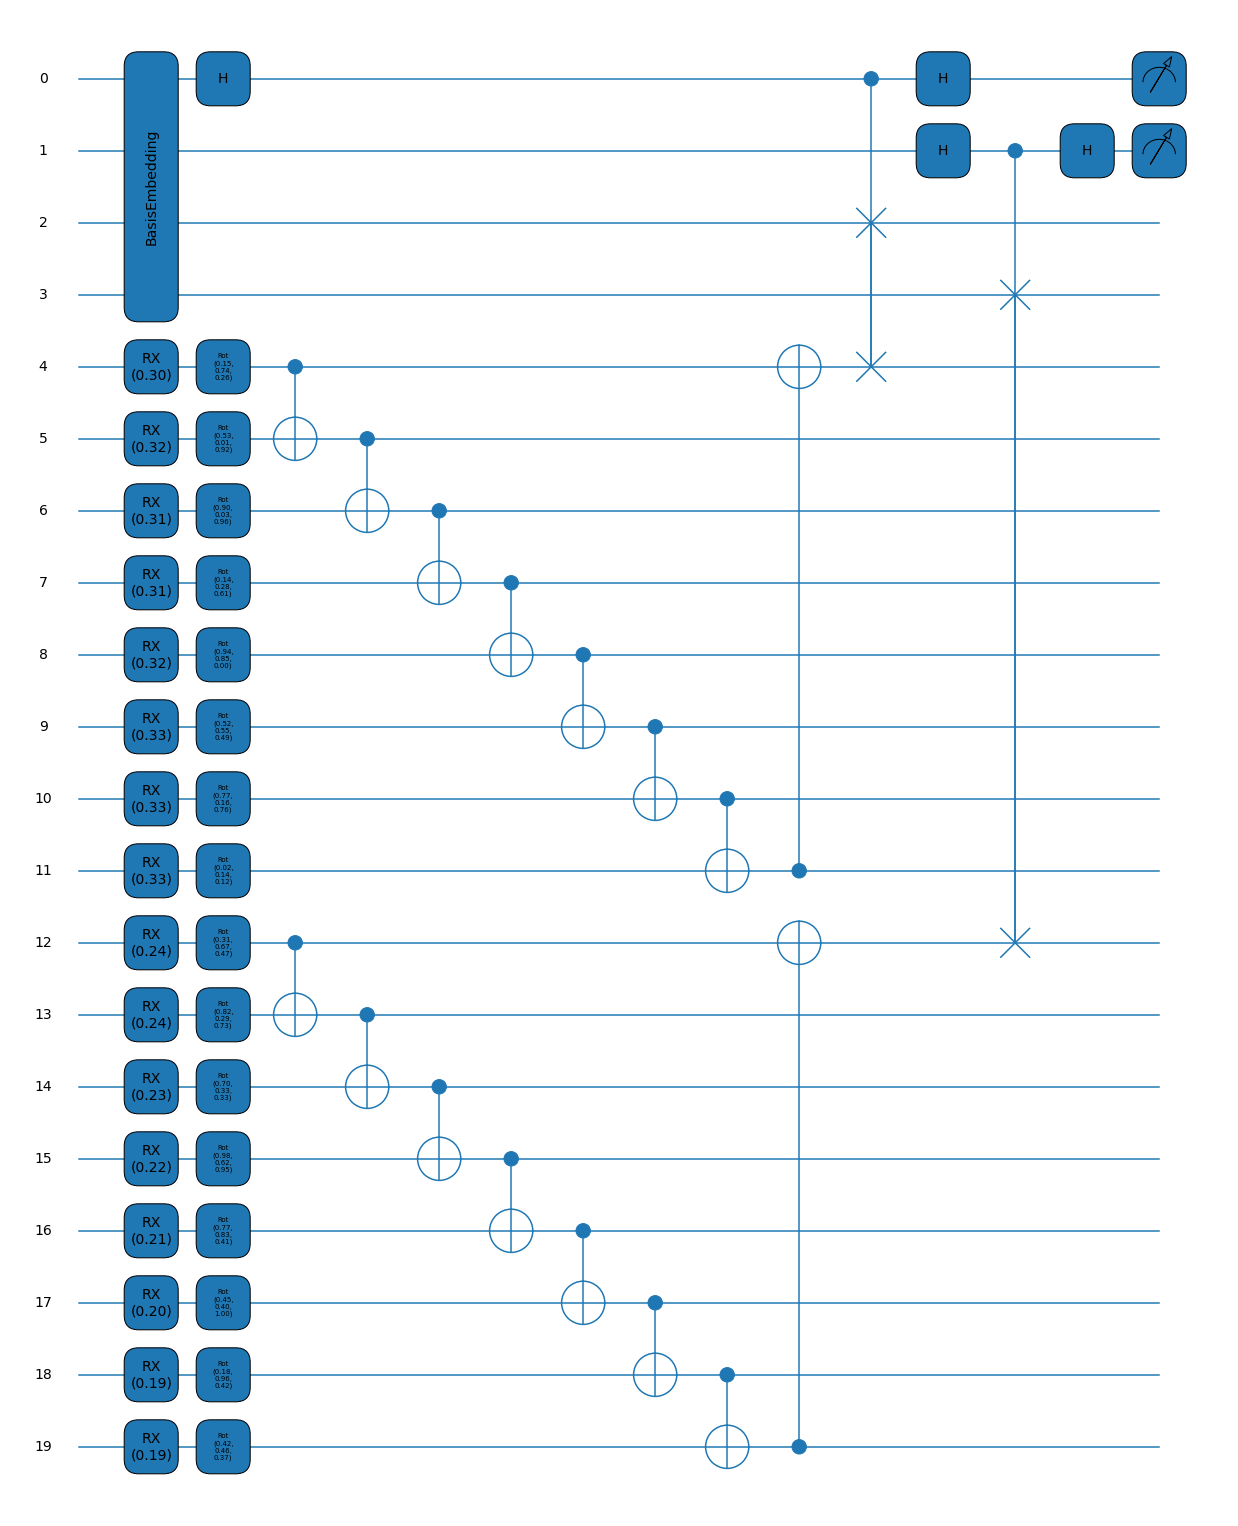

In [13]:
ancilla = circuit(params, x_tumors1[0], x_tumors2[1])
fig, ax = qml.draw_mpl(circuit, show_all_wires=True, decimals=2)(params, x_tumors1[0], x_tumors2[1])

In [14]:
def anci_dist(x, data1, data2, i):
    anci_0, anci_1 = circuit(x, data1[i], data2[i])
    return anci_0, anci_1

In [15]:
def fn_cost(x, data1, data2, i):      # Cost calculation is simple, in perfect match we want: expval(anci) = 0
    funx = 0
    funx2 = 0
    steps = 0
    anci_0, anci_1 = anci_dist(x, data1, data2, i)
    funx += anci_0 + anci_1
    funx2 += anci_1
    cost_hist.append(funx)
    steps += 1
    print(funx)
    return funx

In [16]:
cost_hist = []
cost1_hist = []
weight_tensor = []


for i in range(1):
    minimizer = {'method':'COBYLA', 'args':(x_tumors1, x_tumors2, i)}             # COBYLA was chosen for reduced cpu time. Results are more than satisfactory
    opti = sc.optimize.basinhopping(fn_cost, params, minimizer_kwargs=minimizer, niter=1)
    weight_tensor.append(opti.x)

1.1473125318455366
1.1473125318455382
1.1473125318455373
1.147312531845536
1.1470612040531414
1.0679217691835103
1.0679217691835108
1.0678757923326405
1.048508573717513
1.0485085737175133
1.0480294101398746
1.0420241986971193
1.0420241986971188
1.042023763709682
1.0420095140376935
1.0420095140376933


KeyboardInterrupt: 

Text(0.5, 0, '# of Steps')

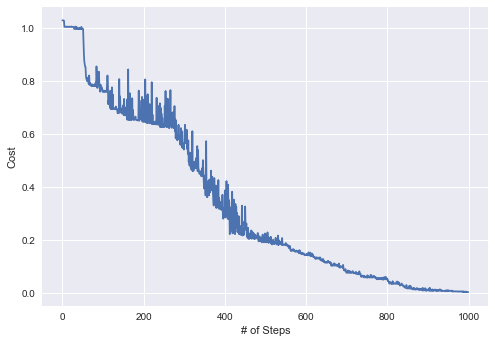

In [ ]:
plt.style.use("seaborn")
plt.plot(cost_hist)
plt.ylabel("Cost")
plt.xlabel("# of Steps")

In [ ]:
opt_error = []
for i in range (len(x_tumors1)):
    for j in range (len(x_benign)):
        ancilla1, ancilla2 = circuit(opti.x, x_tumors1[i], x_benign[j])
        total1 = ancilla1 + ancilla2
        opt_error.append(total1)
opt_error

[tensor(0.01396729, requires_grad=True),
 tensor(0.06665228, requires_grad=True),
 tensor(0.14170517, requires_grad=True),
 tensor(0.02496692, requires_grad=True),
 tensor(0.03977889, requires_grad=True),
 tensor(0.01425199, requires_grad=True),
 tensor(0.06693698, requires_grad=True),
 tensor(0.14198987, requires_grad=True),
 tensor(0.02525163, requires_grad=True),
 tensor(0.04006359, requires_grad=True),
 tensor(0.03864637, requires_grad=True),
 tensor(0.09133136, requires_grad=True),
 tensor(0.16638425, requires_grad=True),
 tensor(0.049646, requires_grad=True),
 tensor(0.06445797, requires_grad=True),
 tensor(0.02354306, requires_grad=True),
 tensor(0.07622805, requires_grad=True),
 tensor(0.15128094, requires_grad=True),
 tensor(0.0345427, requires_grad=True),
 tensor(0.04935466, requires_grad=True),
 tensor(0.01743619, requires_grad=True),
 tensor(0.07012118, requires_grad=True),
 tensor(0.14517407, requires_grad=True),
 tensor(0.02843583, requires_grad=True),
 tensor(0.04324779,

In [ ]:
opt_error_sim = []
for i in range (len(x_tumors1)):
    for j in range (len(x_tumors2)):
        ancilla1, ancilla2 = circuit(opti.x, x_tumors1[i], x_tumors2[j])
        total = ancilla1 + ancilla2
        opt_error_sim.append(total)
opt_error_sim

[tensor(0.00407154, requires_grad=True),
 tensor(0.01562992, requires_grad=True),
 tensor(0.05551534, requires_grad=True),
 tensor(0.02691151, requires_grad=True),
 tensor(0.03387875, requires_grad=True),
 tensor(0.00435624, requires_grad=True),
 tensor(0.01591462, requires_grad=True),
 tensor(0.05580004, requires_grad=True),
 tensor(0.02719622, requires_grad=True),
 tensor(0.03416345, requires_grad=True),
 tensor(0.02875062, requires_grad=True),
 tensor(0.040309, requires_grad=True),
 tensor(0.08019442, requires_grad=True),
 tensor(0.0515906, requires_grad=True),
 tensor(0.05855783, requires_grad=True),
 tensor(0.01364731, requires_grad=True),
 tensor(0.02520569, requires_grad=True),
 tensor(0.06509112, requires_grad=True),
 tensor(0.03648729, requires_grad=True),
 tensor(0.04345452, requires_grad=True),
 tensor(0.00754044, requires_grad=True),
 tensor(0.01909882, requires_grad=True),
 tensor(0.05898424, requires_grad=True),
 tensor(0.03038042, requires_grad=True),
 tensor(0.03734765,

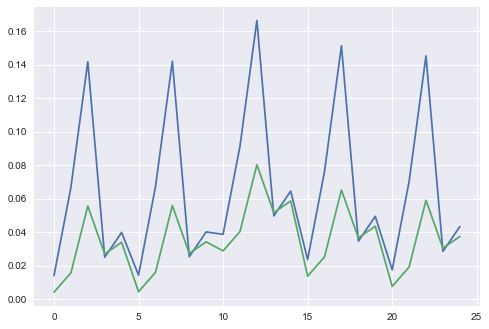

In [ ]:
def plot1(ax):

    return ax.plot(opt_error)

def plot2(ax):

    return ax.plot(opt_error_sim)


fig, ax = plt.subplots(1,1)
l1 = plot1(ax)
l2 = plot2(ax)
plt.show()